In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [99]:
# np.arange(x, y) creates a series that contains all the values of the set [x, y)
furniture = ctrl.Antecedent(np.arange(0, 11), 'furniture')
included_bills = ctrl.Antecedent(np.arange(0, 11), 'included_bills')
localization = ctrl.Antecedent(np.arange(0, 5001), 'localization')
price = ctrl.Consequent(np.arange(0, 1001), 'price')


furniture['none'] = fuzz.trimf(furniture.universe, (0, 0, 0))
furniture['partial'] = fuzz.trapmf(furniture.universe, (0, 1, 6, 8))
furniture['complete'] = fuzz.trapmf(furniture.universe, (6, 8, 10, 10))

included_bills['none'] = fuzz.trimf(included_bills.universe, (0, 0, 0))
included_bills['partial'] = fuzz.trapmf(included_bills.universe, (0, 1, 6, 8))
included_bills['complete'] = fuzz.trapmf(included_bills.universe, (6, 8, 10, 10))

localization['very close'] = fuzz.gaussmf(localization.universe, 0, 500)
localization['close'] = fuzz.gaussmf(localization.universe, 1500, 250)
localization['far'] = fuzz.gaussmf(localization.universe, 3000, 500)
localization['very far'] = fuzz.gaussmf(localization.universe, 5000, 500)

price['cheap'] = fuzz.gaussmf(price.universe, 0, 100)
price['medium'] = fuzz.gaussmf(price.universe, 500, 200)
price['expensive'] = fuzz.gaussmf(price.universe, 1000, 100)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inli

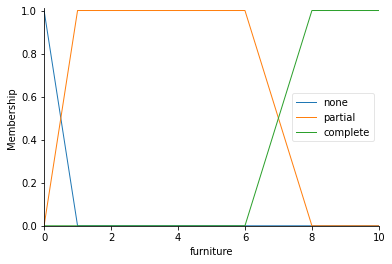

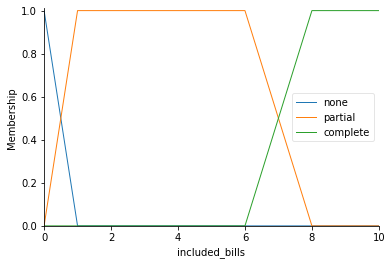

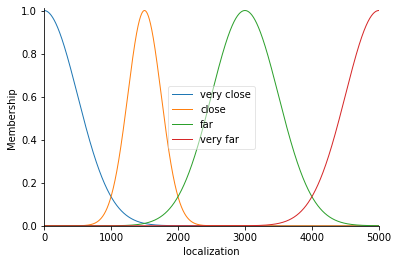

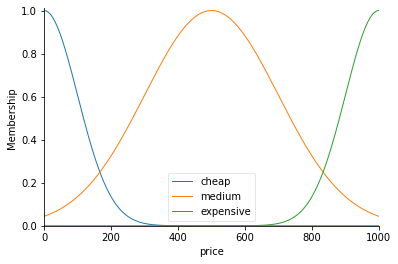

In [100]:
furniture.view()
included_bills.view()
localization.view()
price.view()

### Rules

### Furniture + included bills rules

In [110]:
furniture_included_bills_rules = [
    ctrl.Rule((furniture['none'] & included_bills['none']) | (localization['very far'] | localization['far']), price['cheap']),
    ctrl.Rule((furniture['partial'] | included_bills['partial']) & localization['far'], price['cheap']),
    ctrl.Rule(furniture['complete'] & included_bills['complete'] & localization['far'], price['medium']),
    ctrl.Rule((furniture['complete'] | included_bills['complete']) & (localization['close']), price['medium']),
    ctrl.Rule(furniture['complete'] & included_bills['complete'] & (localization['very close']), price['expensive'])
]

### Localization rules

In [111]:
localization_rules = [
#     ctrl.Rule(localization['far'], price['cheap']),
#     ctrl.Rule(localization['close'], price['medium']),
#     ctrl.Rule(localization['very close'], price['expansive']),
]

In [112]:
rules = localization_rules + furniture_included_bills_rules

## Simulations

### Price by all

481.2894964417334


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


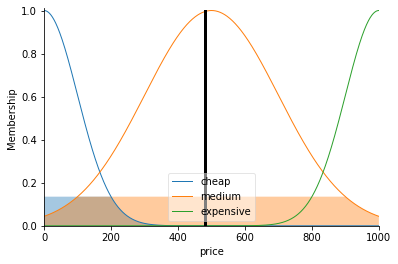

In [115]:
property_ctrl = ctrl.ControlSystem(rules)
property_simulation = ctrl.ControlSystemSimulation(property_ctrl)
property_simulation.input['furniture'] = 6;
property_simulation.input['included_bills'] = 6;
property_simulation.input['localization'] = 4000;
property_simulation.compute();
print(property_simulation.output['price']);
price.view(sim=property_simulation)

### Price by localization

In [32]:
price_by_loc = ctrl.ControlSystem(localization_rules)
price_by_loc_simulation = ctrl.ControlSystemSimulation(price_by_loc)
price_by_loc_simulation.input['localization'] = 3
price_by_loc_simulation.compute()
print(price_by_loc_simulation.output['price'])

385.0112288702905
